# Introduction to Machine Learning: Supervised Learning - Final Project

# <font color='blue'>Project Summary</font>

### Problem description

Hi! This is my Final Project for DTSA 5509 Introduction to Machine Learning: Supervised Learning. In this project, I will be using a dataset I found from www.kaggle.com.<br> 
<br>
Source: https://www.kaggle.com/datasets/kaggler2412/dementia-patient-health-and-prescriptions-dataset
<br>
<br>
This dataset contains anonymized health and prescription data of patients diagnosed with dementia. It includes various features such as patient demographics (age, education level), medical history (e.g., smoking status, depression status), cognitive assessments (e.g., cognitive test scores), laboratory test results (e.g., APOE_e4). The target variable is a binary feature, Dementia, that indicates the presence of dementia. The entire dataset contains 1000 data points.<br>
<br>
Here is the attribute information:<br>
Diabetic (Binary): Indicates whether a patient has been diagnosed with diabetes (1 for yes, 0 for no).

Alcohol Level (Continuous): Measures the alcohol consumption level of patients, possibly reflecting lifestyle choices.

Heart Rate (Continuous): Denotes the number of heartbeats per minute, a critical indicator of cardiovascular health.

Blood Oxygen Level (Continuous): The saturation of oxygen in the blood, a vital sign of respiratory function.

Body Temperature (Continuous): The measured temperature of the body in Celsius, indicating potential fever or hypothermia.

Weight (Continuous): The mass of the patient in kilograms, a fundamental measure of health.

MRI Delay (Continuous): The time delay in obtaining an MRI scan, potentially indicative of the progression or severity of medical conditions.

Prescription: The specific medication prescribed to the patient, relevant for treatment analysis.

Dosage in mg (Continuous): The amount of medication prescribed, critical for dosage-effect studies.

Age (Continuous): The age of the patient, an essential demographic factor.

Education_Level: The highest level of education attained by the patient, which may correlate with health literacy.

Dominant_Hand: Indicates the dominant hand of the patient, which could relate to neurological functions.

Gender: The gender of the patient, a key demographic characteristic.

Family_History: Indicates a family history of dementia, a significant risk factor.

Smoking_Status: Reflects the patient's smoking habits, an important lifestyle indicator.

APOE_ε4: Shows the presence of the APOE ε4 allele, a genetic variant associated with Alzheimer's disease.

Physical_Activity: The level of physical activity of the patient, highlighting lifestyle impacts on health.

Depression_Status: Indicates whether the patient has depression, which can be related to cognitive health.

Cognitive_Test_Scores (Continuous): Scores from cognitive tests, direct measures of cognitive function.

Medication_History: Records whether the patient has a history of medication use, relevant for drug interactions.

Nutrition_Diet: Describes the patient's diet, an important health factor.

Sleep_Quality: Assesses the quality of the patient's sleep, a critical aspect of health.

Chronic_Health_Conditions: Notes any chronic health conditions the patient has, key for comorbidity studies.

Dementia (Binary): Serves as the target variable, indicating the presence (1) or absence (0) of dementia.

### Objective

The objective of this project is to help predict the presence of dementia with a multifaceted view of factors that may contribute to the onset and progression of dementia. The final model will be a classifier that distinguishes between dementia presence/absence. I plan to train an SVM model, tune hyperparameters, and find out the best fitting model.

# <font color='blue'>Exploratory Data Analysis</font>

### Import Libraries

In [81]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import tree

import statsmodels.formula.api as smf
import statsmodels.api as sm

### Data Import

In [82]:
df = pd.read_csv('dementia_patients_health_data.csv')
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [83]:
df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions      0
Dementia                       0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

From df.isnull() and df.info(), we can see that there is not any NULL values. However, there exist NaN values in Prescription and Dosage in mg features. I consider them to be valid missing data (not due to system error) because not everyone needs to have a prescription. However, we will still drop these two features before building the model.

In [85]:
# Drop columns with missing values
df = df.drop(['Prescription', 'Dosage in mg'], axis = 1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Age                        1000 non-null   int64  
 8   Education_Level            1000 non-null   object 
 9   Dominant_Hand              1000 non-null   object 
 10  Gender                     1000 non-null   object 
 11  Family_History             1000 non-null   object 
 12  Smoking_Status             1000 non-null   object 
 13  APOE_ε4                    1000 non-null   object

### Descriptive Statistics

In [87]:
df.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,90.000000,10.000000,1.000000


### Data Visualization (Categorical) 

This step is to find out if there is any categorical feature that contains super unbalanced data and needs to be removed from the model.

(-1.25, 1.25, -1.25, 1.25)

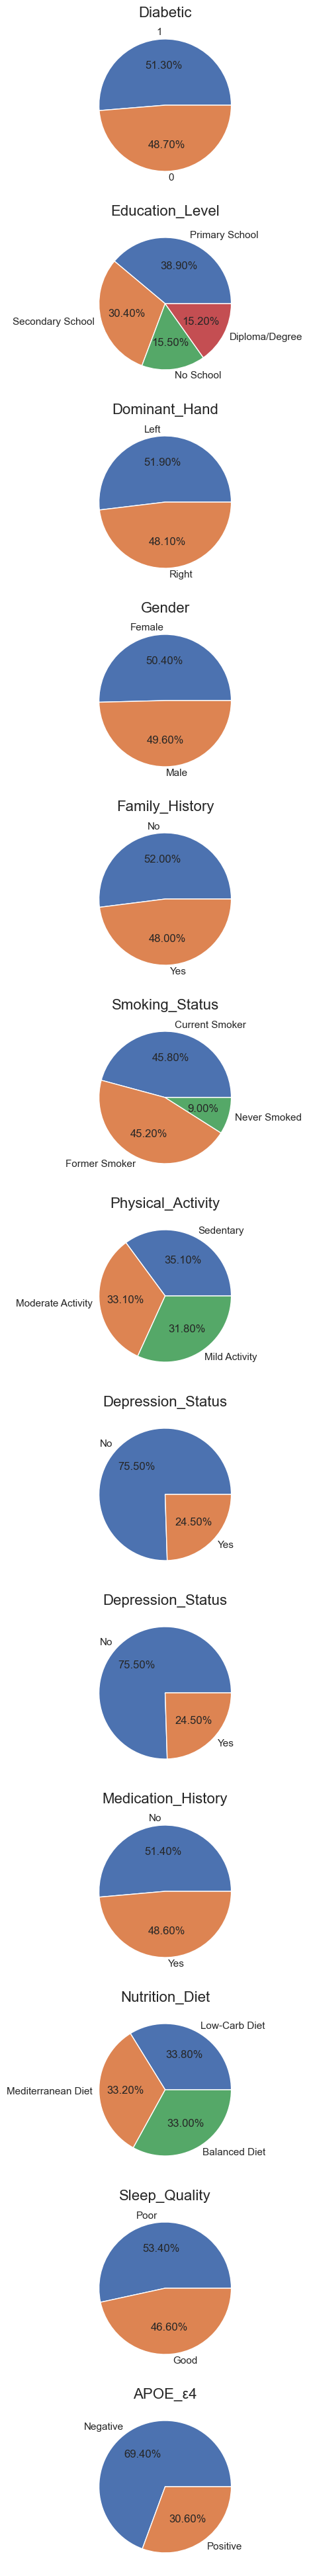

In [88]:
# plot frame
plt.rcParams['figure.figsize'] = (100, 50)
fontsize = 16
total_plot = 13

# 1st pie chart: Diabetic
plt.subplot(total_plot, 1, 1)
labels = df['Diabetic'].unique().tolist()
plt.pie(df['Diabetic'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Diabetic', fontsize = fontsize)
plt.axis('off')

# 2nd pie chart: Education_level
plt.subplot(total_plot, 1, 2)
labels = df['Education_Level'].unique().tolist()
plt.pie(df['Education_Level'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Education_Level', fontsize = fontsize)
plt.axis('off')

# 3rd pie chart: Dominant_Hand
plt.subplot(total_plot, 1, 3)
labels = df['Dominant_Hand'].unique().tolist()
plt.pie(df['Dominant_Hand'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Dominant_Hand', fontsize = fontsize)
plt.axis('off')

# 4th pie chart: Gender
plt.subplot(total_plot, 1, 4)
labels = df['Gender'].unique().tolist()
plt.pie(df['Gender'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Gender', fontsize = fontsize)
plt.axis('off')

# 5th pie chart: Family_History
plt.subplot(total_plot, 1, 5)
labels = df['Family_History'].unique().tolist()
plt.pie(df['Family_History'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Family_History', fontsize = fontsize)
plt.axis('off')

# 6th pie chart: Smoking_Status
plt.subplot(total_plot, 1, 6)
labels = df['Smoking_Status'].unique().tolist()
plt.pie(df['Smoking_Status'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Smoking_Status', fontsize = fontsize)
plt.axis('off')

# 7th pie chart: Physical_Activity
plt.subplot(total_plot, 1, 7)
labels = df['Physical_Activity'].unique().tolist()
plt.pie(df['Physical_Activity'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Physical_Activity', fontsize = fontsize)
plt.axis('off')

# 8th pie chart: Depression_Status
plt.subplot(total_plot, 1, 8)
labels = df['Depression_Status'].unique().tolist()
plt.pie(df['Depression_Status'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Depression_Status', fontsize = fontsize)
plt.axis('off')

# 9th pie chart: Depression_Status
plt.subplot(total_plot, 1, 9)
labels = df['Depression_Status'].unique().tolist()
plt.pie(df['Depression_Status'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Depression_Status', fontsize = fontsize)
plt.axis('off')

# 10th pie chart: Medication_History
plt.subplot(total_plot, 1, 10)
labels = df['Medication_History'].unique().tolist()
plt.pie(df['Medication_History'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Medication_History', fontsize = fontsize)
plt.axis('off')

# 11th pie chart: Nutrition_Diet
plt.subplot(total_plot, 1, 11)
labels = df['Nutrition_Diet'].unique().tolist()
plt.pie(df['Nutrition_Diet'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Nutrition_Diet', fontsize = fontsize)
plt.axis('off')

# 12th pie chart: Sleep_Quality
plt.subplot(total_plot, 1, 12)
labels = df['Sleep_Quality'].unique().tolist()
plt.pie(df['Sleep_Quality'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('Sleep_Quality', fontsize = fontsize)
plt.axis('off')

# 13th pie chart: APOE_ε4
plt.subplot(total_plot, 1, 13)
labels = df['APOE_ε4'].unique().tolist()
plt.pie(df['APOE_ε4'].value_counts(), labels = labels, autopct='%.2f%%')
plt.title('APOE_ε4', fontsize = fontsize)
plt.axis('off')

There doesn't seem to be any categorical features that needs to be excluded.

### Data Visualization (Continuous) 

This step is to determine if there is any outlier or super skewed distributions among the continuous features. These might affect the accuracy of model and might need to be removed.

<Axes: xlabel='Cognitive_Test_Scores'>

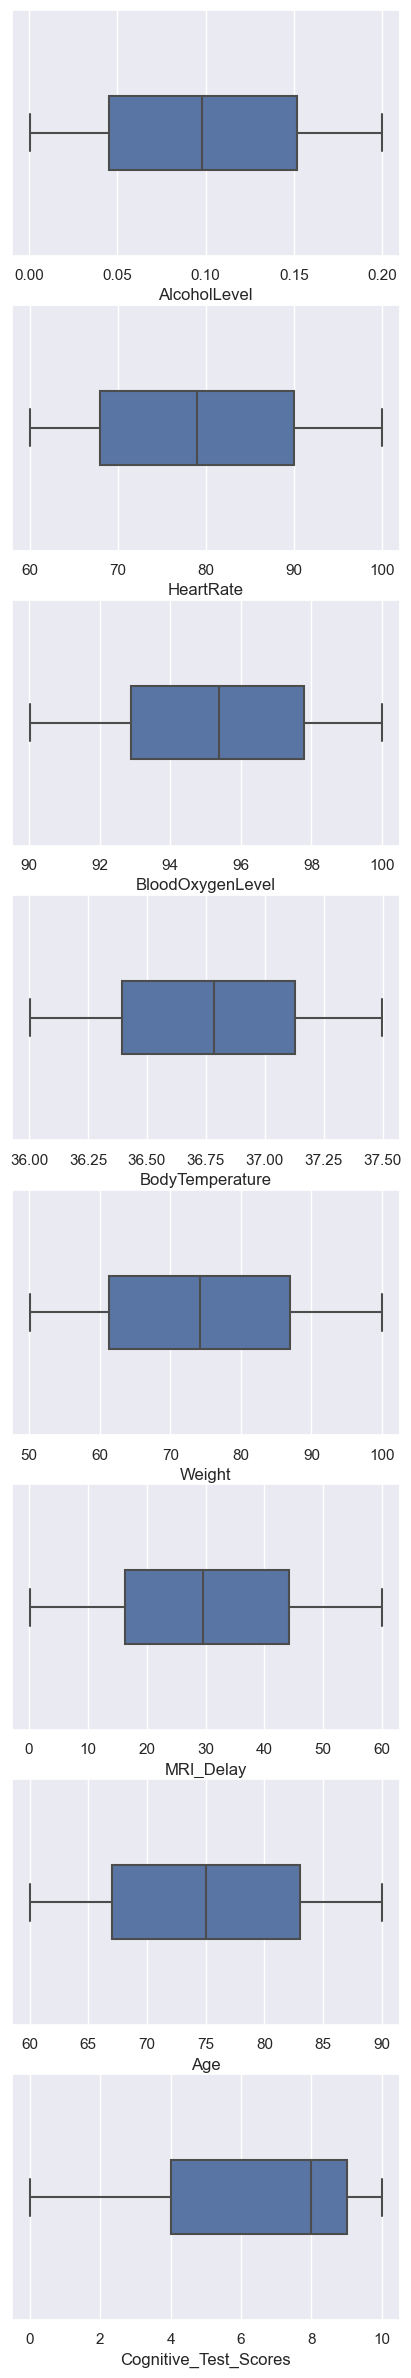

In [89]:
# plot frame
plt.rcParams['figure.figsize'] = (5, 30)
fontsize = 16
total_plot = 8

# Continuous features
# AlcoholLevel               
# HeartRate                  
# BloodOxygenLevel           
# BodyTemperature            
# Weight      
# MRI_Delay                  
# Age                        
# Cognitive_Test_Scores    

sns.set_theme(style = "darkgrid")

plt.subplot(total_plot, 1, 1)
sns.boxplot(x = df['AlcoholLevel'], width = .3)

plt.subplot(total_plot, 1, 2)
sns.boxplot(x = df['HeartRate'], width = .3)

plt.subplot(total_plot, 1, 3)
sns.boxplot(x = df['BloodOxygenLevel'], width = .3)

plt.subplot(total_plot, 1, 4)
sns.boxplot(x = df['BodyTemperature'], width = .3)

plt.subplot(total_plot, 1, 5)
sns.boxplot(x = df['Weight'], width = .3)

plt.subplot(total_plot, 1, 6)
sns.boxplot(x = df['MRI_Delay'], width = .3)

plt.subplot(total_plot, 1, 7)
sns.boxplot(x = df['Age'], width = .3)

plt.subplot(total_plot, 1, 8)
sns.boxplot(x = df['Cognitive_Test_Scores'], width = .3)

There doesn't seem to be any abnormal data points that need to be excluded before we go further into analysis.

### Data Correlation 

Next, I would like to see if the continuous features are correlated with each other.

<Axes: >

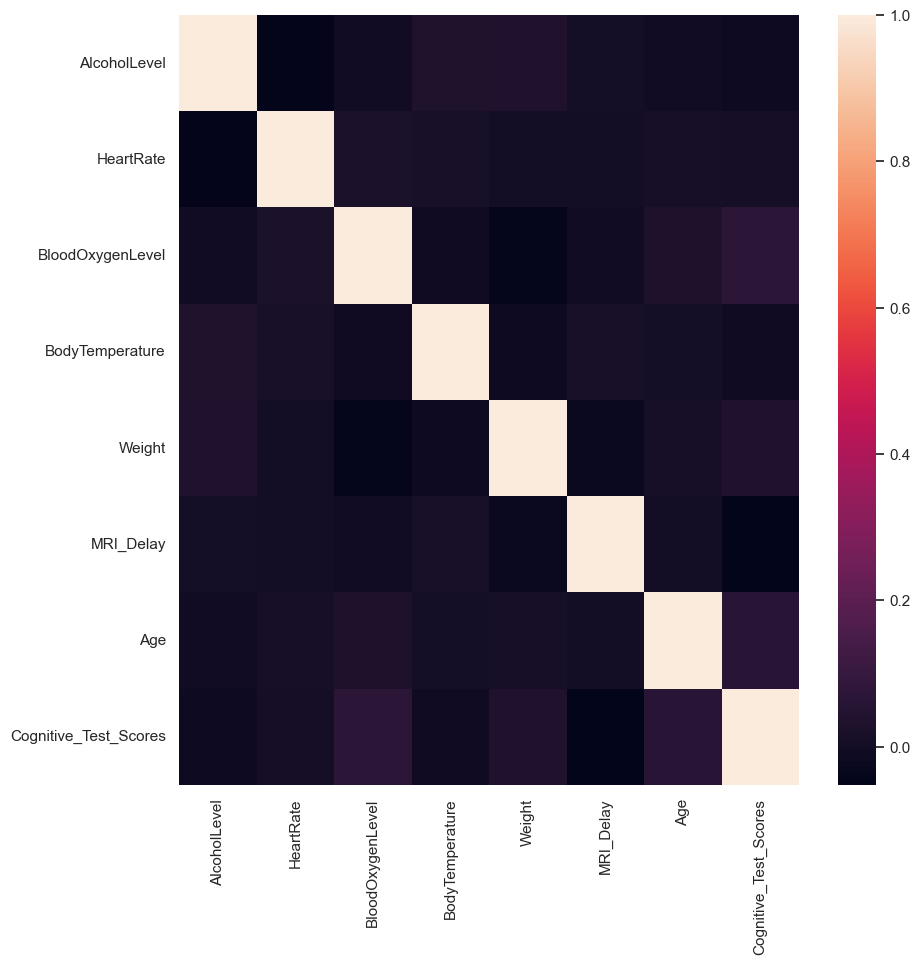

In [93]:
plt.rcParams['figure.figsize'] = (10, 10)
df_continuous = df[['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores']]
sns.heatmap(df_continuous.corr())

There is little correlation among the features. I then conclude that we don't need to worry about duplicate information or dimension reduction, and it is safe to go on with building the model with all the provided features.

# <font color='blue'>Modeling</font>

### Feature Engineering

As a crucial step in data preprocessing, feature engineering helps us to transform taw data into a format suitable for machine learning algorithms. In the previous preprocessing, we handled missing values, made sure categorical variables were encoded correctly, and also made sure no transformation was needed for skewed data. Here we'd like to do some further feature engineering that contributes to model interpretability. As a result, this process will be specifically based on domain knowledge and description of features.

Particularly, I will exclude features that are more likely confounded by irrelevant factors, or those that are less interpretable as an influential element of dementia. These features include: <br>

Education_Level. 

Education level is defined as the highest level of education attained by the patient. It is stated that education level may correlate with health literacy. However, with the average age of the group being 75, and minimum age being 60, I question whether education level would be a good choice of indicator of health literacy, as there should already be decades since the group was last "officially educated". I will then remove this feature from the model.

MRI_Delay. 

Defined as the time delay in obtaining an MRI scan, MRI_Delay feature could serve as an indicator of the severity of medical conditions, but it could also be influenced by too many other factors that can cause contamination or misinterpretation of the modeling.<br>

Prescription. 

Already removed in data preprocessing due to missing values. <br>

Dosage in mg. 

Already removed in data preprocessing due to missing values. <br>

This feature engineering leaves us with 19 predictors.

In [100]:
df = df.drop(['Education_Level', 'MRI_Delay'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   Age                        1000 non-null   int64  
 7   Dominant_Hand              1000 non-null   object 
 8   Gender                     1000 non-null   object 
 9   Family_History             1000 non-null   object 
 10  Smoking_Status             1000 non-null   object 
 11  APOE_ε4                    1000 non-null   object 
 12  Physical_Activity          1000 non-null   object 
 13  Depression_Status          1000 non-null   object

### Multilinear Regression

Even we could visualize from the correlation matrix that there is little correlation among the features, we would like to test for collinearity with a linear model.

In [107]:
predictors = df.columns.difference(['Dementia'])
formula = "Dementia ~" + " + ".join(predictors)
linear_model = smf.ols(formula, data = df).fit()

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Dementia   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     145.7
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          3.06e-296
Time:                        14:52:24   Log-Likelihood:                 19.122
No. Observations:                1000   AIC:                             9.756
Df Residuals:                     976   BIC:                             127.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

From the linear model results we could tell that no predictors are correlated to each other. In addition, linear model is not the best way to fit this dataset with.

### Convert Categorical Features

In addition, I will also convert the features with string values to numeric then to dummy variables for classifier training. Instructions see here: https://www.ritchieng.com/machinelearning-one-hot-encoding/

In [115]:
from sklearn import preprocessing

In [121]:
# Get all object (categorical) predictors
predictors_cat = df.select_dtypes(include = [object])
predictors_cat.head()
# predictors_cat.columns

,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions
0,Left,Female,No,Current Smoker,Negative,Sedentary,No,No,Low-Carb Diet,Poor,Diabetes
1,Right,Male,No,Former Smoker,Positive,Moderate Activity,No,Yes,Low-Carb Diet,Poor,Heart Disease
2,Right,Male,Yes,Former Smoker,Negative,Moderate Activity,No,No,Mediterranean Diet,Poor,Heart Disease
3,Left,Female,Yes,Never Smoked,Negative,Mild Activity,Yes,Yes,Balanced Diet,Poor,Hypertension
4,Right,Male,Yes,Never Smoked,Positive,Mild Activity,No,Yes,Low-Carb Diet,Good,Diabetes


In [122]:
####### Didn't use it to avoid a misinterpretation of category ordering
# # Use LabelEncoder to convert string categories to integers
# le = preprocessing.LabelEncoder()
# predictors_cat_int = predictors_cat.apply(le.fit_transform)
# predictors_cat_int.head()

,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions
0,0,0,0,0,0,2,0,0,1,1,0
1,1,1,0,1,1,1,0,1,1,1,1
2,1,1,1,1,0,1,0,0,2,1,1
3,0,0,1,2,0,0,1,1,0,1,2
4,1,1,1,2,1,0,0,1,1,0,0


In [129]:
# Use OneHotEncoder to encode these categorical features to numerical (dummy)
# refer to: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html
oh = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")
oh_encoded = oh.fit_transform(predictors_cat)

In [143]:
oh_encoded

,Dominant_Hand_Left,Dominant_Hand_Right,Gender_Female,Gender_Male,Family_History_No,Family_History_Yes,Smoking_Status_Current Smoker,Smoking_Status_Former Smoker,Smoking_Status_Never Smoked,APOE_ε4_Negative,...,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
996,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
997,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [137]:
# Replace the original categorical features with new dummy features
df_dummied = pd.concat([df, oh_encoded], axis = 1).drop(columns = predictors_cat.columns)

In [139]:
# Examine new dataframe
df_dummied.shape

(1000, 36)

In [140]:
df_dummied.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,Age,Cognitive_Test_Scores,Dementia,Dominant_Hand_Left,...,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,60,10,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0.016973,78,93.032122,36.183874,56.832335,61,1,1,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0.009000,89,93.566504,37.326321,59.759066,69,8,0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0.086437,60,93.906510,37.030620,58.266471,78,5,1,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0.150747,67,97.508994,36.062121,67.705027,77,0,1,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [142]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Diabetic                                 1000 non-null   int64  
 1   AlcoholLevel                             1000 non-null   float64
 2   HeartRate                                1000 non-null   int64  
 3   BloodOxygenLevel                         1000 non-null   float64
 4   BodyTemperature                          1000 non-null   float64
 5   Weight                                   1000 non-null   float64
 6   Age                                      1000 non-null   int64  
 7   Cognitive_Test_Scores                    1000 non-null   int64  
 8   Dementia                                 1000 non-null   int64  
 9   Dominant_Hand_Left                       1000 non-null   float64
 10  Dominant_Hand_Right                      1000 non

### Scale Continuous Features

I will also scale all continuous features to ensure that they are on a similar scale. This can help improve the convergence and performance of the machine learning models.

In [146]:
# all continuous predictors
predictors_cont = df[df.select_dtypes(exclude = [object]).columns.difference(['Dementia'])]
predictors_cont.head()

,Age,AlcoholLevel,BloodOxygenLevel,BodyTemperature,Cognitive_Test_Scores,Diabetic,HeartRate,Weight
0,60,0.084974,96.230743,36.224852,10,1,98,57.563978
1,61,0.016973,93.032122,36.183874,1,0,78,56.832335
2,69,0.009000,93.566504,37.326321,8,0,89,59.759066
3,78,0.086437,93.906510,37.030620,5,0,60,58.266471
4,77,0.150747,97.508994,36.062121,0,1,67,67.705027


In [150]:
# sklearn scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform = "pandas")
predictors_cont_scaler = scaler.fit(predictors_cont).transform(predictors_cont)
predictors_cont_scaler.head()

,Age,AlcoholLevel,BloodOxygenLevel,BodyTemperature,Cognitive_Test_Scores,Diabetic,HeartRate,Weight
0,-1.639950,-0.229285,0.343156,-1.243754,1.137764,0.974329,1.538404,-1.159154
1,-1.529946,-1.388015,-0.749344,-1.338723,-1.693277,-1.026347,-0.114283,-1.209764
2,-0.649908,-1.523866,-0.566824,1.308986,0.508644,-1.026347,0.794695,-1.007314
3,0.340135,-0.204344,-0.450694,0.623677,-0.435037,-1.026347,-1.601702,-1.110561
4,0.230130,0.891495,0.779747,-1.620896,-2.007837,0.974329,-1.023262,-0.457668


### Combine Processed Categorical (dummy) and Continuous (scaled) Predictors

In [155]:
df_processed = pd.concat([oh_encoded, predictors_cont_scaler, df['Dementia']], axis = 1)
df_processed.head()

,Dominant_Hand_Left,Dominant_Hand_Right,Gender_Female,Gender_Male,Family_History_No,Family_History_Yes,Smoking_Status_Current Smoker,Smoking_Status_Former Smoker,Smoking_Status_Never Smoked,APOE_ε4_Negative,...,Chronic_Health_Conditions_None,Age,AlcoholLevel,BloodOxygenLevel,BodyTemperature,Cognitive_Test_Scores,Diabetic,HeartRate,Weight,Dementia
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,-1.639950,-0.229285,0.343156,-1.243754,1.137764,0.974329,1.538404,-1.159154,0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.529946,-1.388015,-0.749344,-1.338723,-1.693277,-1.026347,-0.114283,-1.209764,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,-0.649908,-1.523866,-0.566824,1.308986,0.508644,-1.026347,0.794695,-1.007314,0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.340135,-0.204344,-0.450694,0.623677,-0.435037,-1.026347,-1.601702,-1.110561,1
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.230130,0.891495,0.779747,-1.620896,-2.007837,0.974329,-1.023262,-0.457668,1


In [156]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dominant_Hand_Left                       1000 non-null   float64
 1   Dominant_Hand_Right                      1000 non-null   float64
 2   Gender_Female                            1000 non-null   float64
 3   Gender_Male                              1000 non-null   float64
 4   Family_History_No                        1000 non-null   float64
 5   Family_History_Yes                       1000 non-null   float64
 6   Smoking_Status_Current Smoker            1000 non-null   float64
 7   Smoking_Status_Former Smoker             1000 non-null   float64
 8   Smoking_Status_Never Smoked              1000 non-null   float64
 9   APOE_ε4_Negative                         1000 non-null   float64
 10  APOE_ε4_Positive                         1000 non

### Machine Learning Model - SVM

I will train SVM model on this dataset. This is because 19 predictors is relatively high-dimensional, and SVM is effective for high-dimensional data. It can also capture complex decision boundaries.

In [165]:
# test predictors
df_processed[df_processed.columns.difference(['Dementia'])].to_numpy()

array([[ 1.        ,  0.        , -1.63995037, ...,  0.        ,
         0.        , -1.15915419],
       [ 0.        ,  1.        , -1.52994565, ...,  1.        ,
         0.        , -1.20976399],
       [ 1.        ,  0.        , -0.64990789, ...,  1.        ,
         0.        , -1.00731361],
       ...,
       [ 0.        ,  1.        , -0.86991733, ...,  0.        ,
         1.        ,  0.39893988],
       [ 0.        ,  1.        , -1.41994093, ...,  0.        ,
         1.        ,  1.4526918 ],
       [ 0.        ,  1.        ,  0.56014403, ...,  0.        ,
         1.        , -1.15171968]])

In [172]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_processed[df_processed.columns.difference(['Dementia'])].to_numpy(), df_processed['Dementia'].to_numpy())

In [175]:
clf_SVM = SVC(kernel = 'rbf', C = 5, gamma = 3) # I randomly chose kernel, C, and gamma here. I will compare different options later
clf_SVM_fit = clf_SVM.fit(X_train, y_train)
clf_SVM_fit

scores = clf_SVM.score(X_test, y_test)
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

cross-val mean-accuracy: 0.536


I'll then try different evaluation metrics

In [183]:
# Check roc auc score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf_SVM_fit.decision_function(X_test))

0.8544776119402986

0.536 cross-validation mean accuracy is not a great performance, but 0.854 ROC AUC score is pretty good (falling in the range of 0.8 - 0.9). Next step, I will stick with SVM and try different hyper-parameters using GridSearchCV.

In [193]:
# parameters = {'kernel':('linear','poly', 'rbf', 'sigmoid'), 'C':[1, 10, 100, 1000], 'gamma':[1e-2, 1e-3, 1e-4]}
parameters = {'C':[1, 10, 100, 1000], 'gamma':[1e-2, 1e-3, 1e-4]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf_fit = clf.fit(X_train, y_train)
clf_fit
results = clf.cv_results_

print(results['mean_test_score'])

[0.97066667 0.92666667 0.508      0.98266667 0.972      0.928
 0.98666667 0.98       0.972      0.98666667 1.         0.98      ]


To visualize the results, I use a loop and compare the results to GridSearchCV results.

In [197]:
kernels = ['poly', 'rbf', 'sigmoid']
Cs = [1, 10, 100, 1000]
gammas = [1e-2, 1e-3, 1e-4]

for k in kernels:
    for c in Cs:
        for g in gammas:
            clf = SVC(kernel = k, C = c, gamma = g)
            clf.fit(X_train, y_train)
            scores = clf.score(X_test, y_test)
            print("kernel: ", k, "; C: ", c, "; gamma: ", g, "; cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

kernel:  poly ; C:  1 ; gamma:  0.01 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  1 ; gamma:  0.001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  1 ; gamma:  0.0001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  10 ; gamma:  0.01 ; cross-val mean-accuracy: 0.900
kernel:  poly ; C:  10 ; gamma:  0.001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  10 ; gamma:  0.0001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  100 ; gamma:  0.01 ; cross-val mean-accuracy: 0.964
kernel:  poly ; C:  100 ; gamma:  0.001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  100 ; gamma:  0.0001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  1000 ; gamma:  0.01 ; cross-val mean-accuracy: 0.968
kernel:  poly ; C:  1000 ; gamma:  0.001 ; cross-val mean-accuracy: 0.536
kernel:  poly ; C:  1000 ; gamma:  0.0001 ; cross-val mean-accuracy: 0.536
kernel:  rbf ; C:  1 ; gamma:  0.01 ; cross-val mean-accuracy: 0.960
kernel:  rbf ; C:  1 ; gamma:  0.001 ; cross-val mean-accurac

# <font color='blue'>Results and Analysis</font>

Firstly, it's evident that the choice of kernel function significantly impacts model accuracy. The polynomial kernel consistently yields lower accuracies across varying values of C and gamma, suggesting it may not be the most suitable choice for this dataset. On the other hand, the radial basis function (RBF) kernel demonstrates superior performance, especially with higher values of C and gamma. Notably, for the RBF kernel, increasing both C and gamma tends to improve accuracy, with the highest accuracies achieved at C=1000 and gamma=0.001. Additionally, the sigmoid kernel also exhibits competitive performance, particularly at higher values of C and gamma, although not as consistently high as the RBF kernel.

Based on the model accuracy scores, I decide to use kernel = rbf, C = 1000, gamma = 0.001 as the hyperparameters for the best-performing SVC model.

In [198]:
best_svc = SVC(kernel = 'rbf', C = 1000, gamma = 0.001)
best_svc.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

Next I will determine the most influential features in this model

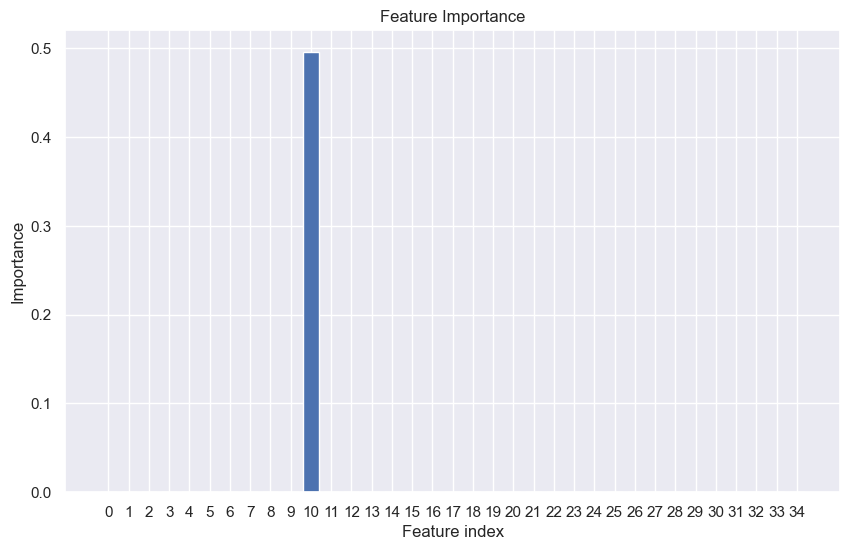

In [200]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_svc, X_train, y_train, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

# visualization
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=range(df_processed[df_processed.columns.difference(['Dementia'])].to_numpy().shape[1]))
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [202]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dominant_Hand_Left                       1000 non-null   float64
 1   Dominant_Hand_Right                      1000 non-null   float64
 2   Gender_Female                            1000 non-null   float64
 3   Gender_Male                              1000 non-null   float64
 4   Family_History_No                        1000 non-null   float64
 5   Family_History_Yes                       1000 non-null   float64
 6   Smoking_Status_Current Smoker            1000 non-null   float64
 7   Smoking_Status_Former Smoker             1000 non-null   float64
 8   Smoking_Status_Never Smoked              1000 non-null   float64
 9   APOE_ε4_Negative                         1000 non-null   float64
 10  APOE_ε4_Positive                         1000 non

The importance of features shows APOE_ε4_Positive contributes the most to this SVM model.

# <font color='blue'>Discussion and Conclusion</font>

The finding that APOE_ε4_Positive contributes the most to the SVM model in predicting dementia is both intriguing and significant. APOE, particularly the ε4 allele, has long been implicated as a major genetic risk factor for Alzheimer's disease, the most common form of dementia. The high accuracy achieved by the model indicates a robust predictive capability, suggesting that the presence of the APOE ε4 allele strongly influences the likelihood of developing dementia in the dataset under consideration. This finding aligns with existing literature highlighting the pivotal role of APOE in dementia risk assessment and underscores the importance of genetic factors in disease prediction models. 

However, it's essential to exercise caution in generalizing these results beyond the specific dataset and population studied. Specifically, since the source of dataset is not given on kaggle, there is no way to know if the source is unbiased. My concern comes from the Dominant_Hand feature which shows 51.9% of the sample are left-handed, 48.1% right. The ratio does not match the distribution in population, where about 90% are right-handed, according to a paper published on Scientific Reports in 2019 (Kovel et al., 2019, https://www.nature.com/articles/s41598-018-37423-8). This mismatch introduces a question on the generalization of dataset. Further validation using independent datasets and diverse cohorts would strengthen the reliability and generalizability of the model. 

Moreover, while APOE ε4 status emerges as a prominent predictor, exploring additional features and their interactions could provide deeper insights into the multifaceted nature of dementia risk. Overall, this study underscores the potential of machine learning techniques, particularly SVM models, in leveraging genetic information for accurate dementia prediction, offering valuable avenues for early detection and intervention strategies in clinical practice.